### Individual Homework

#### Enter your name here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [2]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [8]:
movies.groupby("genre").agg(count = ("genre", "count")).sort_values(by = "count", ascending=False).reset_index()

,genre,count
0,Comedy,848
1,Action,738
2,Drama,498
3,Adventure,288
4,Crime,202
5,Biography,135
6,Horror,131
7,Animation,35
8,Fantasy,28
9,Documentary,25


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [13]:
BudgetReturn = (movies.groupby("genre")
        .agg(avg_gross = ("gross", "mean"), 
            avg_budget = ("budget", "mean"))
        .assign(return_on_budget = lambda x: x.avg_gross / x.avg_budget)
        .sort_values(by = "return_on_budget", ascending = False)
        .reset_index()
    )

BudgetReturn

,genre,avg_gross,avg_budget,return_on_budget
0,Musical,9.208400e+07,3.189500e+06,28.870983
1,Family,1.491605e+08,1.483333e+07,10.055763
2,Western,2.082188e+07,3.465000e+06,6.009202
3,Documentary,1.735397e+07,5.887852e+06,2.947420
4,Horror,3.771374e+07,1.350492e+07,2.792593
5,Fantasy,4.240884e+07,1.758214e+07,2.412040
6,Comedy,4.263055e+07,2.444632e+07,1.743843
7,Mystery,6.753302e+07,3.921875e+07,1.721958
8,Animation,9.843379e+07,6.170143e+07,1.595324
9,Biography,4.520181e+07,2.854370e+07,1.583600


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [14]:
top_directors = (movies.groupby("director")
                 .agg(gross_revenue = ("gross", "sum"),
                      gross_mean = ("gross", "mean"),
                      gross_median = ("gross", "median"),
                      gross_sd = ("gross", "std"))
                .sort_values(by = "gross_revenue", ascending = False).head(15)
                .reset_index()
                )
top_directors

,director,gross_revenue,gross_mean,gross_median,gross_sd
0,Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
1,Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
2,Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
3,Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
4,James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
5,Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
6,George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
7,Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
8,Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07
9,Francis Lawrence,1358501971,2.717004e+08,281666058.0,1.354370e+08


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

In [21]:
ratings_by_genre = (movies.groupby("genre")
                    .agg(
                        avg_rating = ("rating", "mean"),
                        median_rating = ("rating", "median"),
                        std_rating = ("rating", lambda x: np.std(x)**2),
                        min_rating = ("rating", "min"),
                        max_rating = ("rating", "max"))
                    .sort_values(by = "avg_rating", ascending = False)
                    .reset_index()
                    )
ratings_by_genre




,genre,avg_rating,median_rating,std_rating,min_rating,max_rating
0,Biography,7.114074,7.20,0.573061,4.5,8.9
1,Crime,6.915347,6.90,0.717834,4.8,9.3
2,Mystery,6.856250,6.90,0.728711,4.6,8.5
3,Musical,6.750000,6.75,0.202500,6.3,7.2
4,Drama,6.731526,6.80,0.839187,2.1,8.8
5,Documentary,6.660000,7.40,2.996000,1.6,8.5
6,Sci-Fi,6.657143,6.40,1.025306,5.0,8.2
7,Animation,6.651429,6.90,0.910498,4.5,8.0
8,Romance,6.650000,6.65,0.202500,6.2,7.1
9,Adventure,6.506597,6.60,1.192422,2.3,8.6


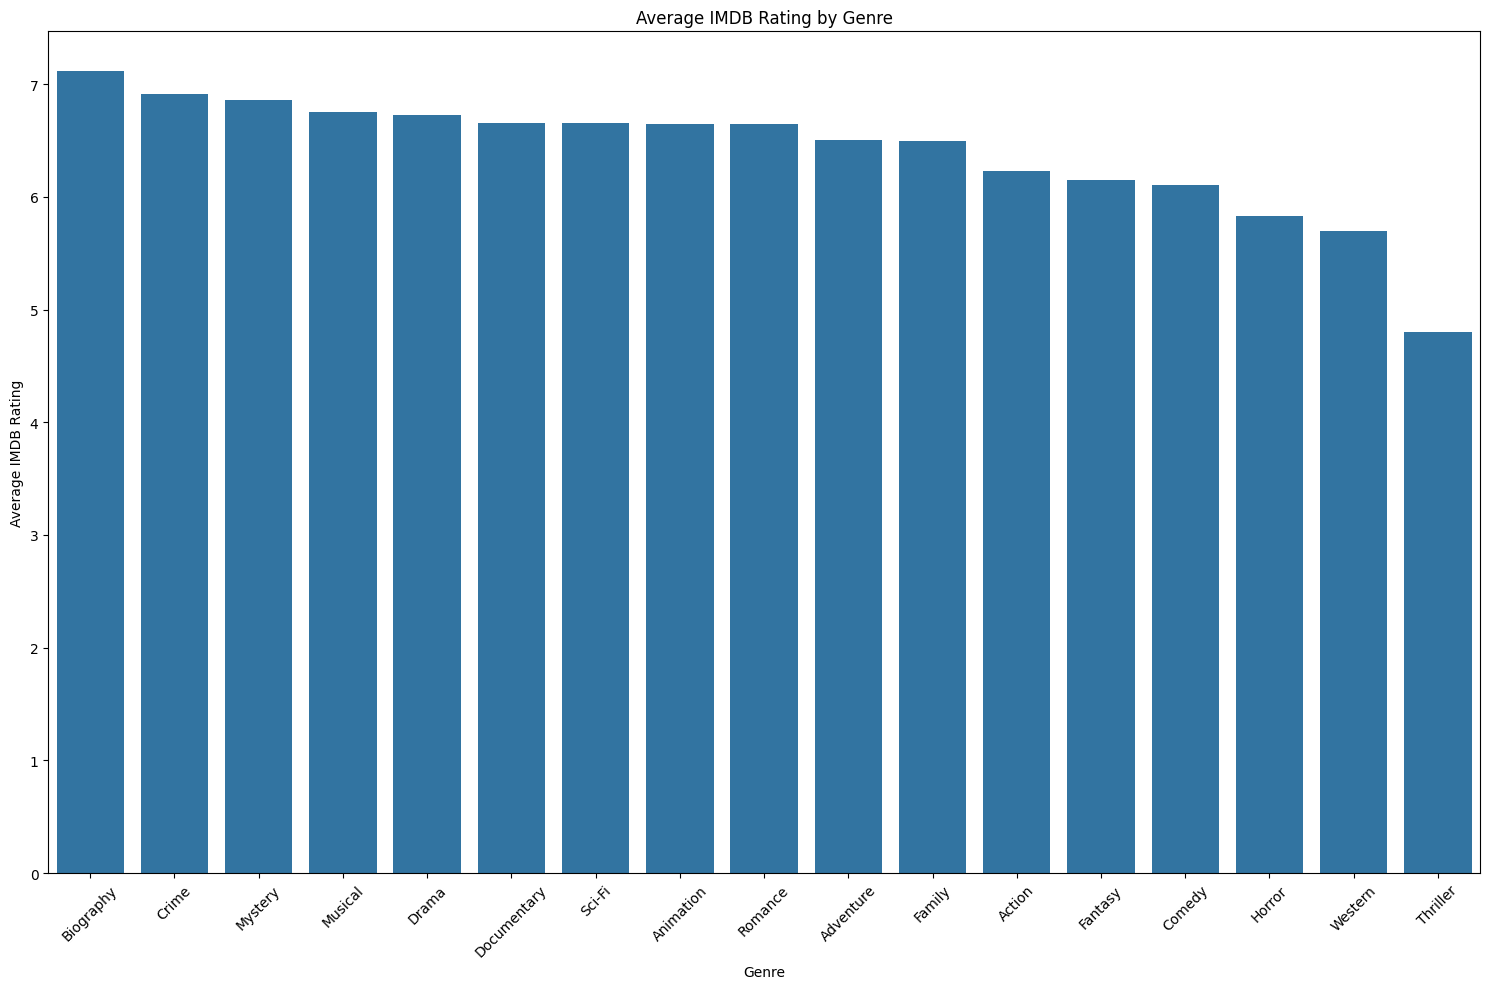

In [23]:
plt.figure(figsize = (15, 10))
sns.barplot(data = ratings_by_genre, x = "genre", y = "avg_rating")
plt.title("Average IMDB Rating by Genre")
plt.xlabel("Genre") 
plt.ylabel("Average IMDB Rating")
plt.xticks(rotation = 45)   
plt.tight_layout()
plt.show()

**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [ ]:
# A table about the best genre by gross revenue for each year, also showing the average rating and total votes for that genre in that year.

best_genres_by_gross = (
    movies.groupby(["year", "genre"])
        .agg(
            total_gross = ("gross", "sum"),
            avg_rating = ("rating", "mean"),
            total_votes = ("votes", "sum")
        )
        .sort_values(by = ["year", "total_gross"], ascending = False)
        .groupby("year")
        .head(1)
        .reset_index()
)

best_genres_by_gross

,year,genre,total_gross,avg_rating,total_votes
0,2016,Action,2924623750,6.500000,2323572
1,2015,Action,3002733904,6.246154,3609518
2,2014,Action,4423973629,6.489474,7646148
3,2013,Action,3036965503,6.471875,6775289
4,2012,Action,3229022523,6.322222,7009384
...,...,...,...,...,...
64,1936,Comedy,163245,8.600000,143086
65,1935,Comedy,3000000,7.800000,13269
66,1933,Comedy,2300000,7.700000,7921
67,1929,Musical,2808000,6.300000,4546


#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

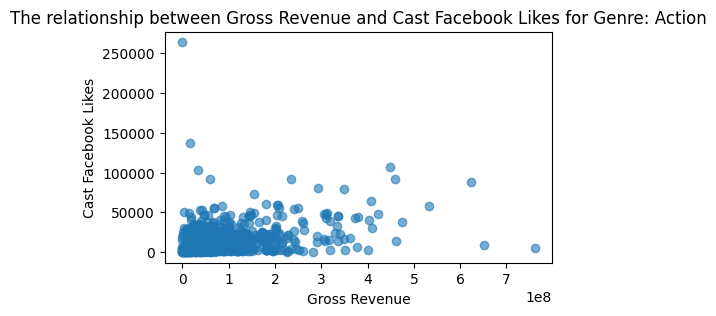

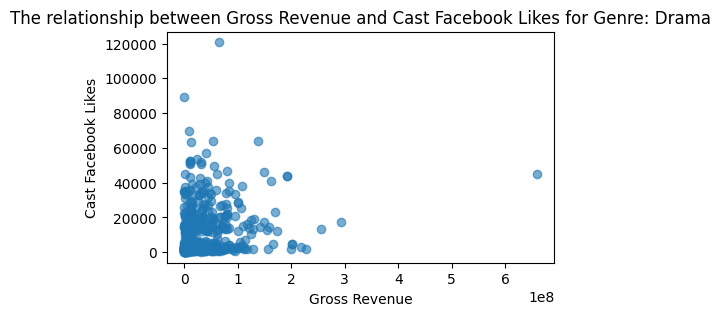

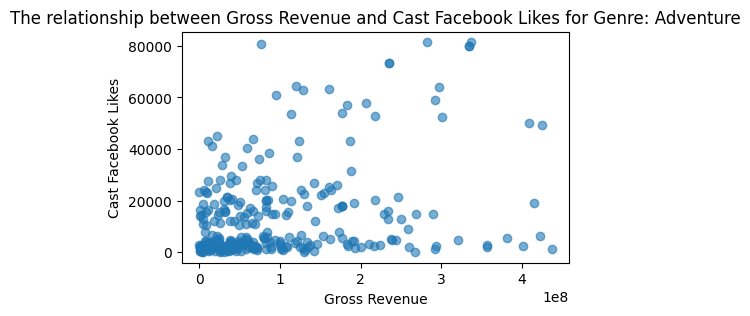

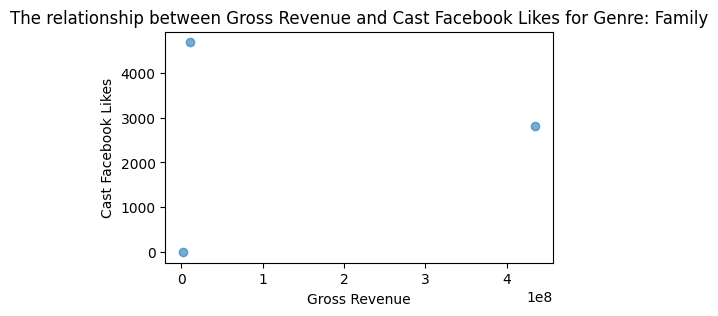

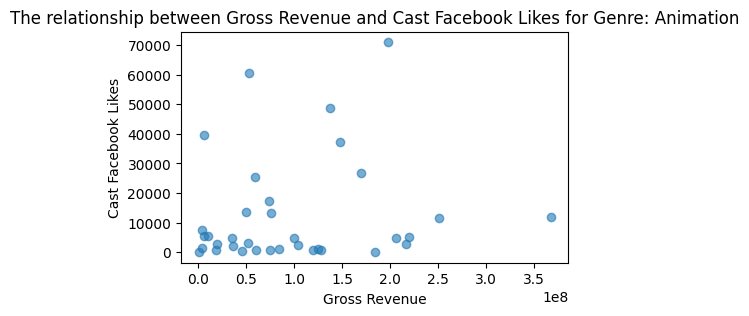

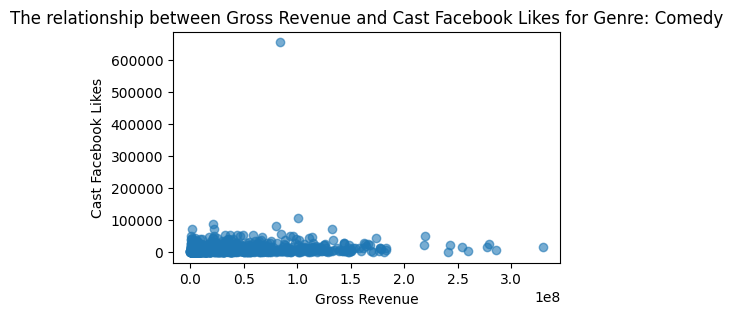

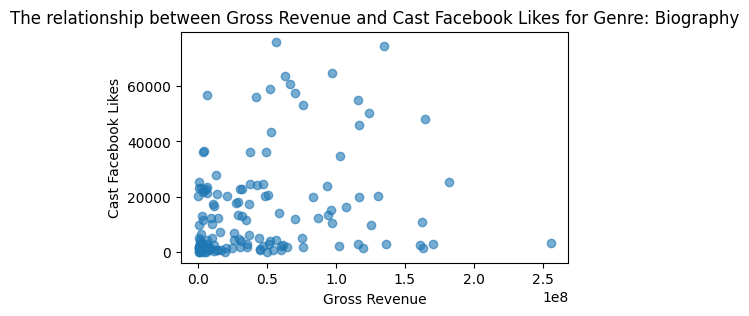

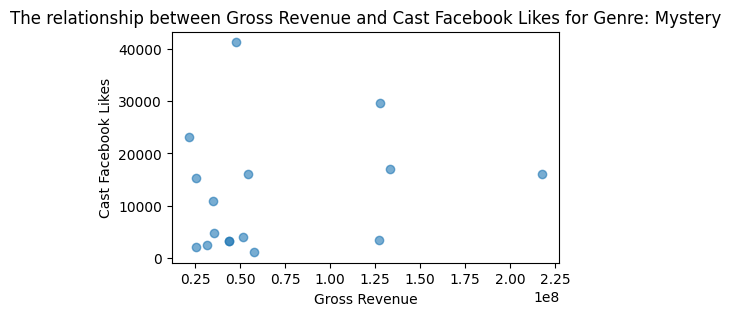

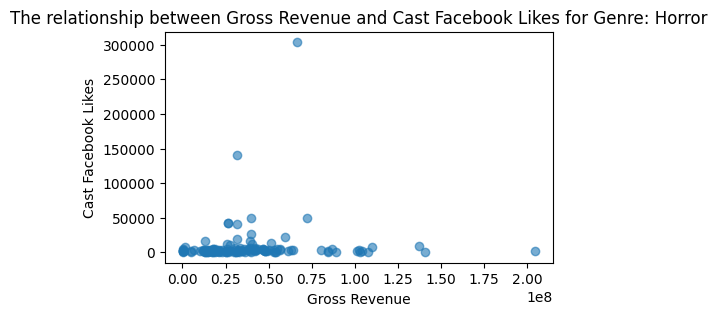

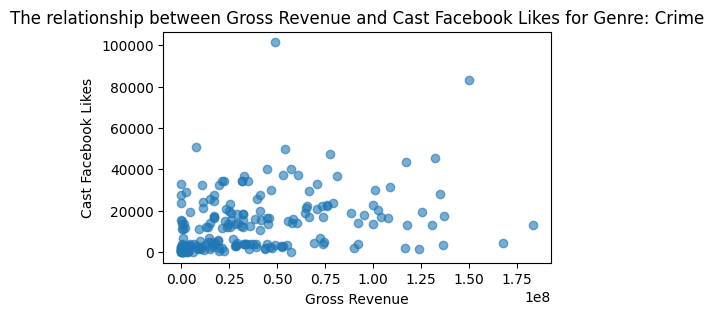

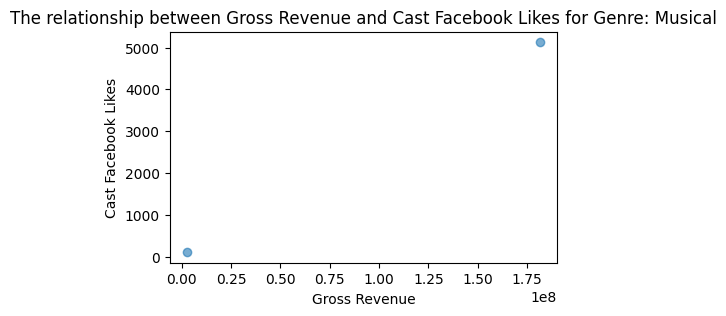

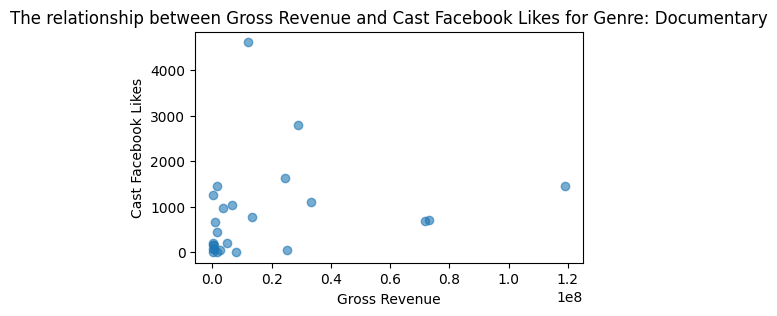

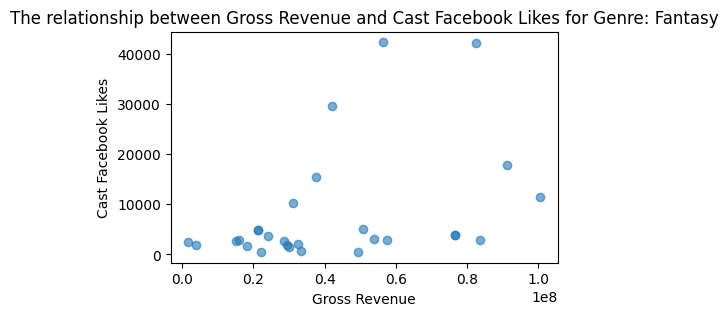

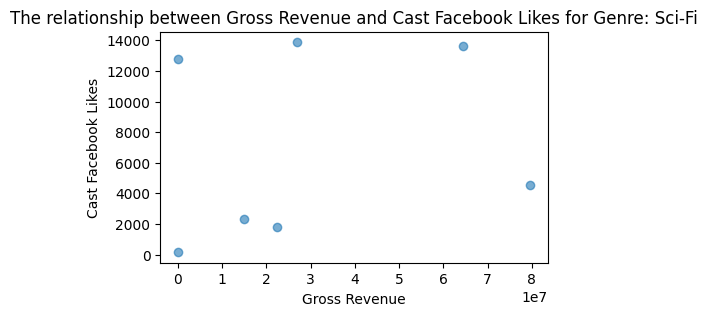

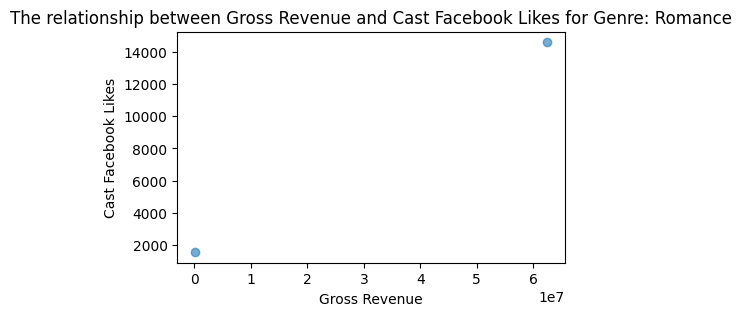

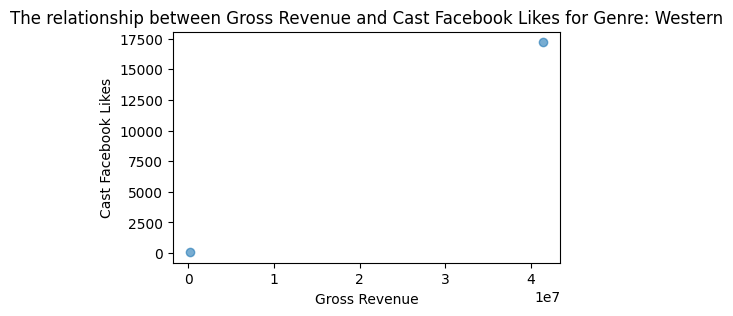

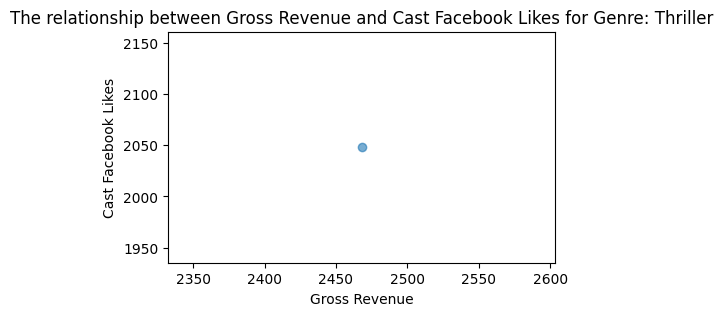

In [54]:
for i in movies["genre"].unique():
    plt.figure(figsize = (5, 3))
    subset = movies[movies["genre"] == i]
    plt.scatter(subset["gross"], subset["cast_facebook_likes"], alpha = 0.6)
    plt.title(f"The relationship between Gross Revenue and Cast Facebook Likes for Genre: {i}")
    plt.xlabel("Gross Revenue") 
    plt.ylabel("Cast Facebook Likes")
    plt.show()

There is no necessary connection between the gross revenue of a film and the likes, which the members of the cast were getting. There are genres, where we can observe relationship, for exemple at the crime and the drama, but the majority of cases do not show relationship.

**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

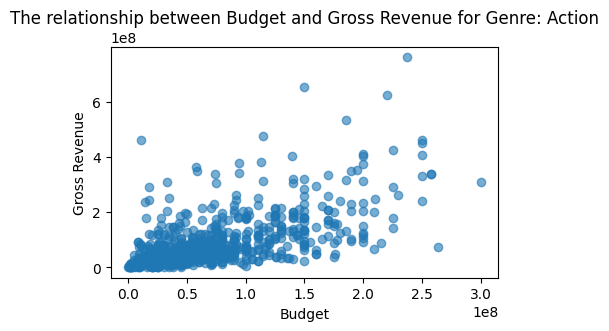

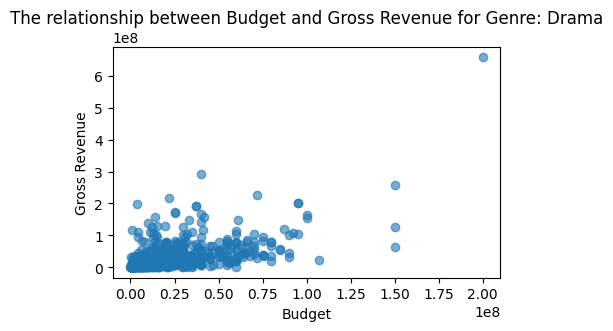

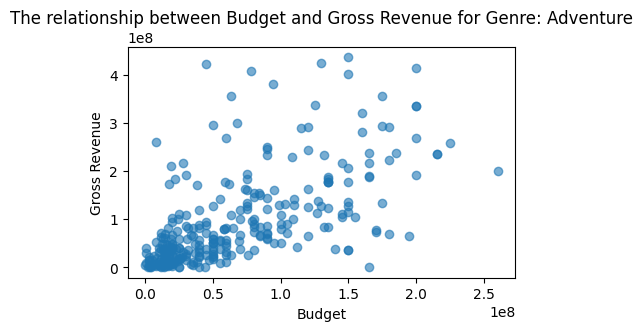

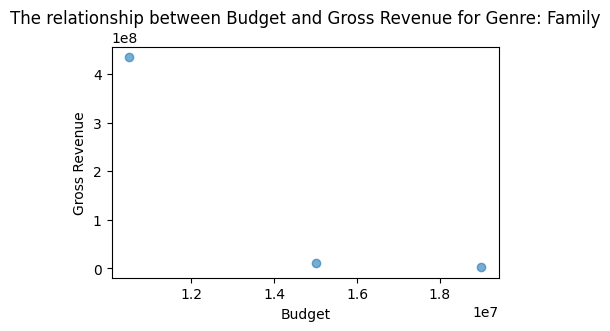

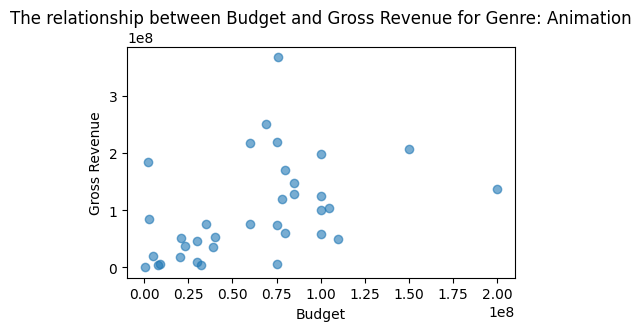

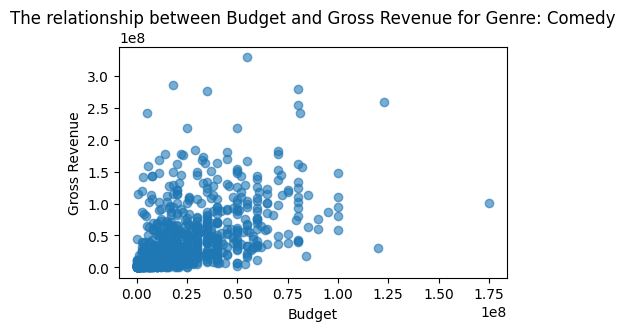

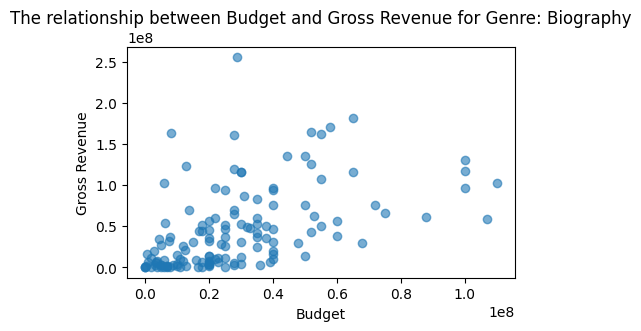

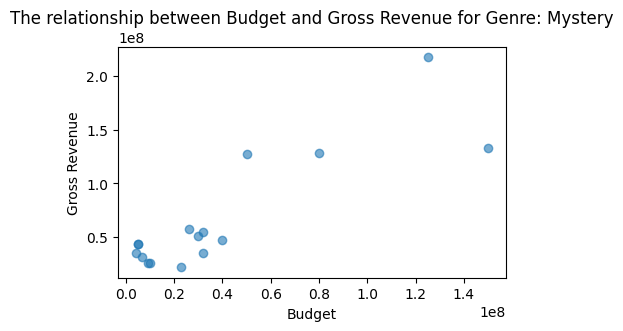

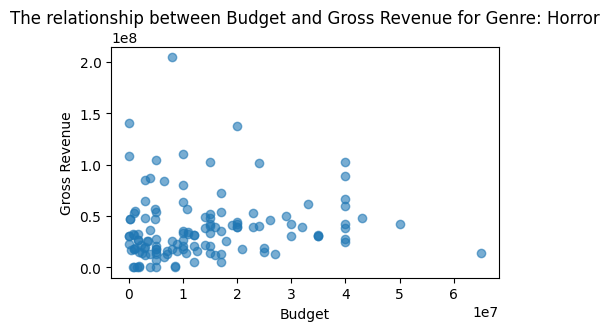

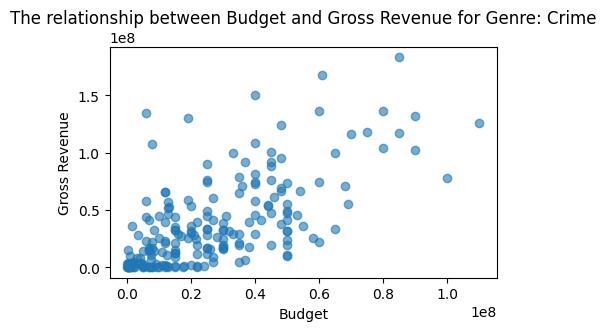

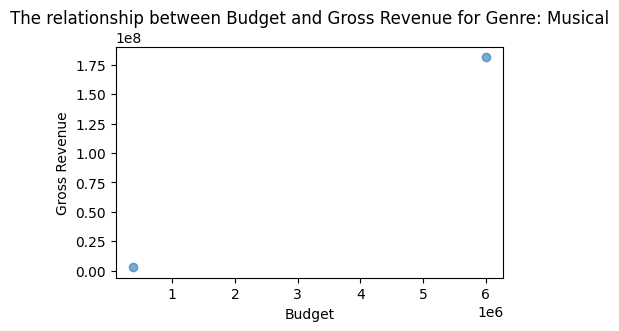

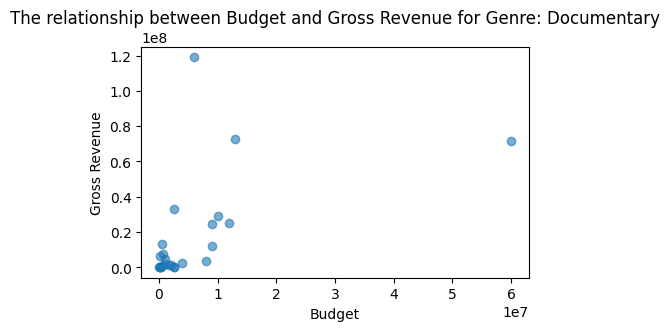

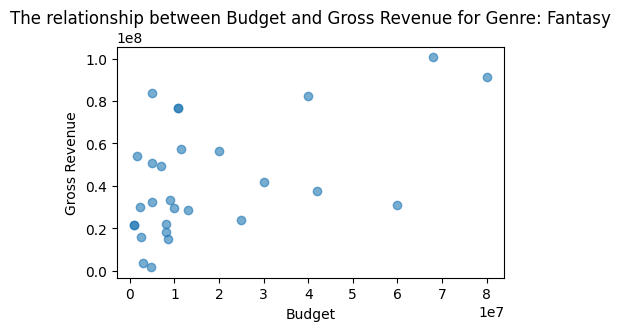

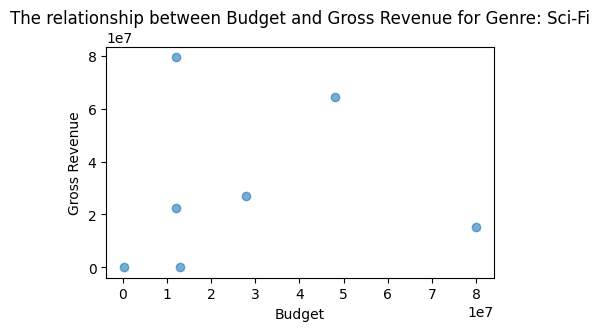

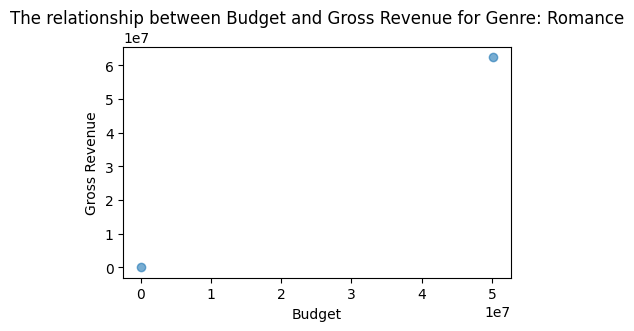

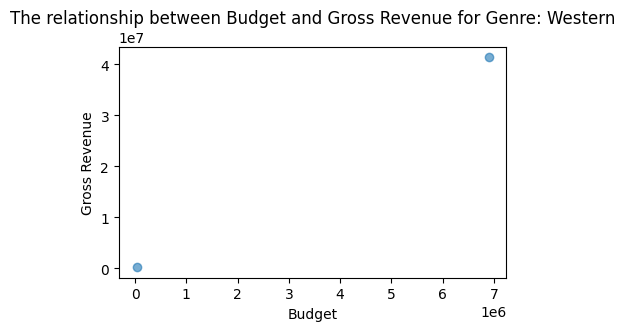

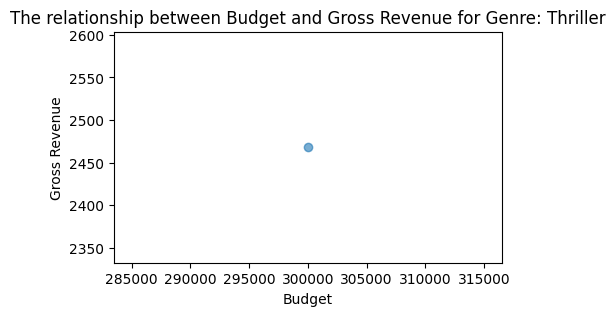

In [52]:
for i in movies["genre"].unique():
    plt.figure(figsize = (5, 3))
    subset = movies[movies["genre"] == i]
    plt.scatter(subset["budget"], subset["gross"], alpha = 0.6)
    plt.title(f"The relationship between Budget and Gross Revenue for Genre: {i}")
    plt.xlabel("Budget")
    # plt.xscale("log")
    # plt.yscale("log") 
    plt.ylabel("Gross Revenue")
    plt.show()

Just like at the previous figure, except some genre, there is no necessary relation between the budget and the gross revenue.

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

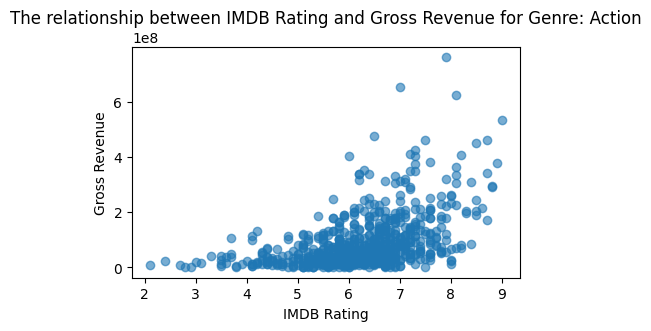

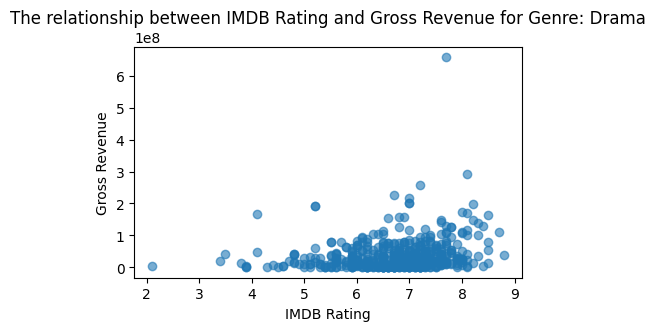

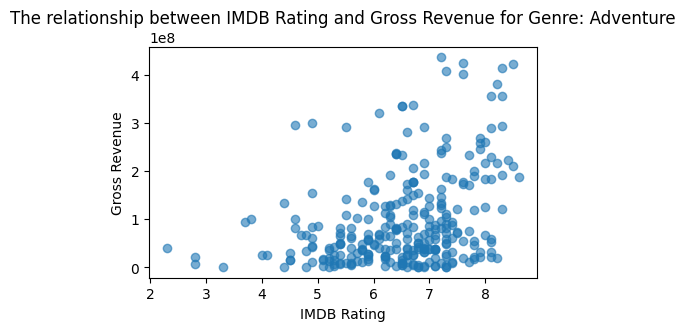

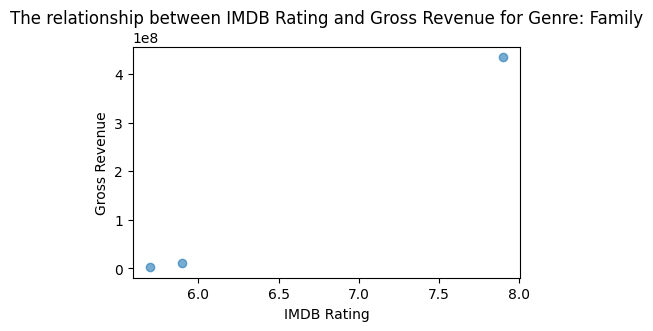

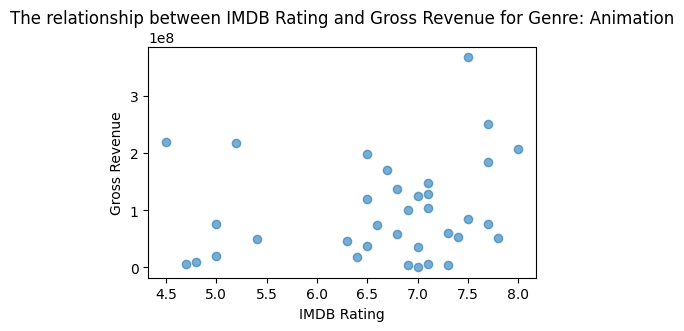

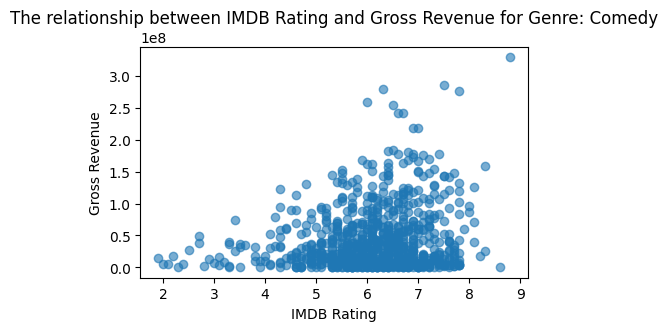

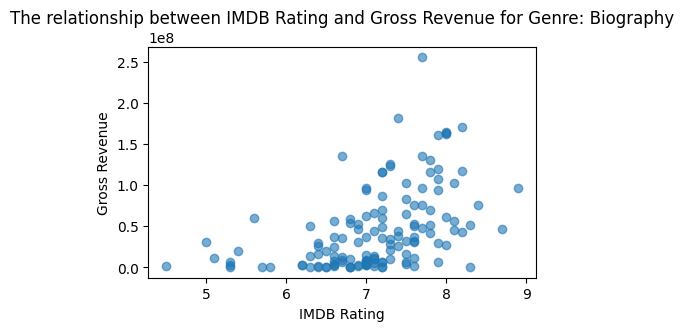

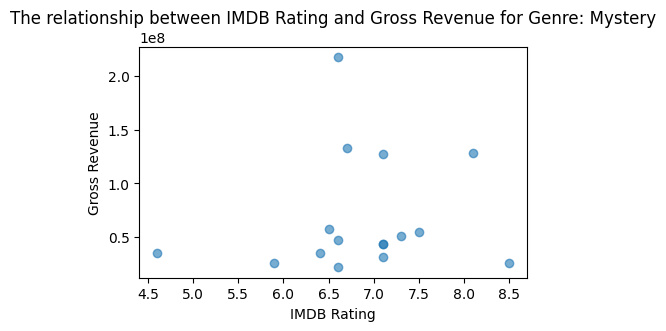

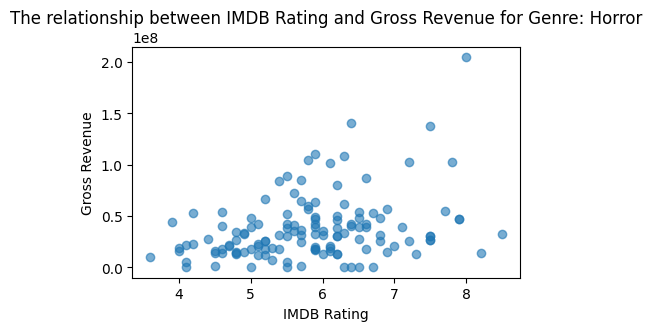

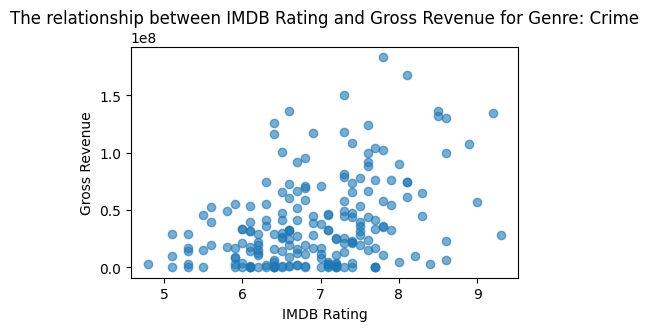

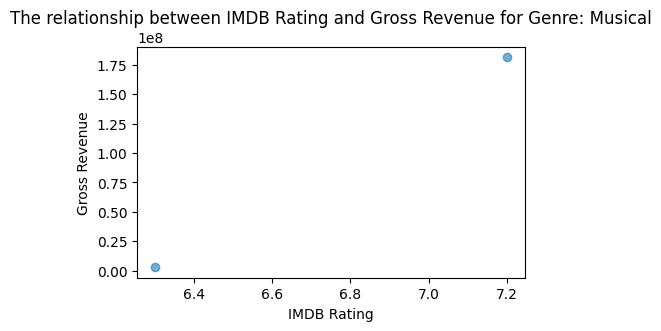

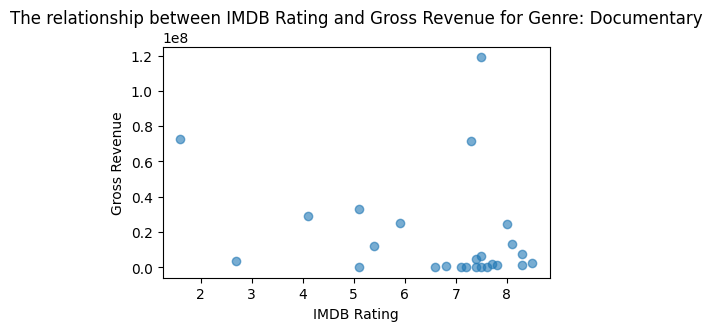

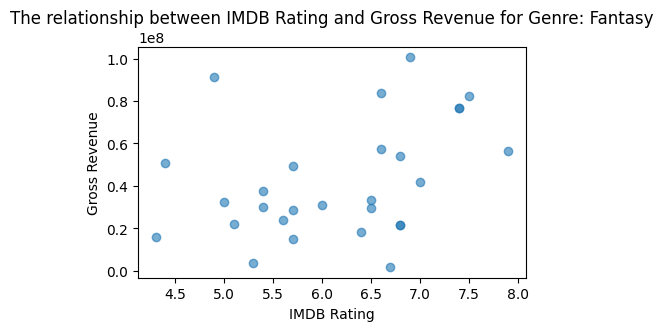

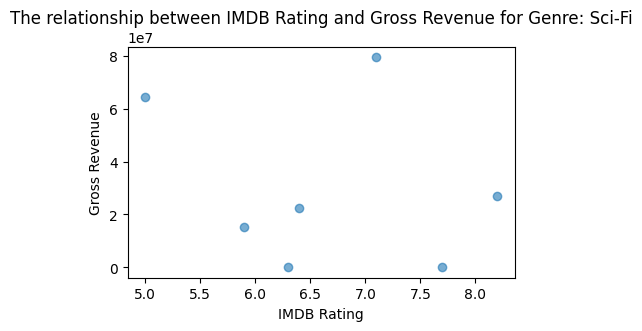

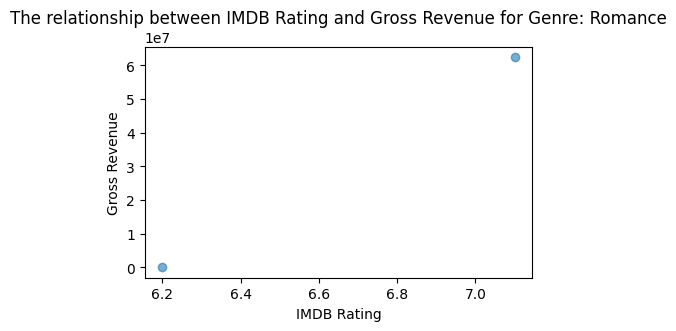

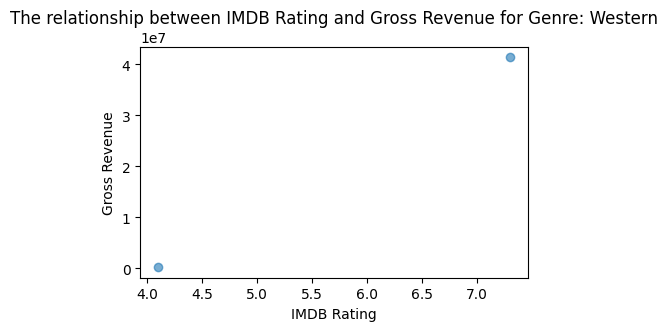

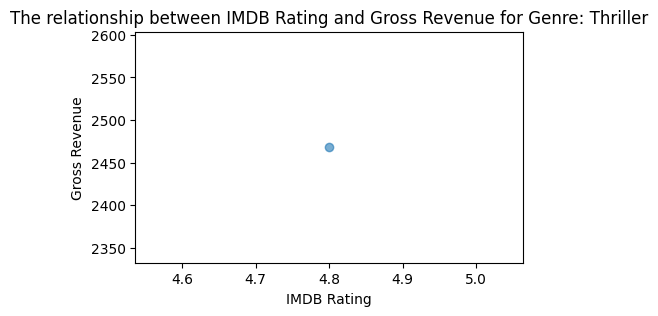

In [53]:
for i in movies["genre"].unique():
    plt.figure(figsize = (5, 3))
    subset = movies[movies["genre"] == i]
    plt.scatter(subset["rating"], subset["gross"], alpha = 0.6)
    plt.title(f"The relationship between IMDB Rating and Gross Revenue for Genre: {i}")
    plt.xlabel("IMDB Rating")   
    plt.ylabel("Gross Revenue")
    plt.show()

Compared to the previous two relations, between the IMDB Rating and Gross Revenue exists an easily observable relationship.

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

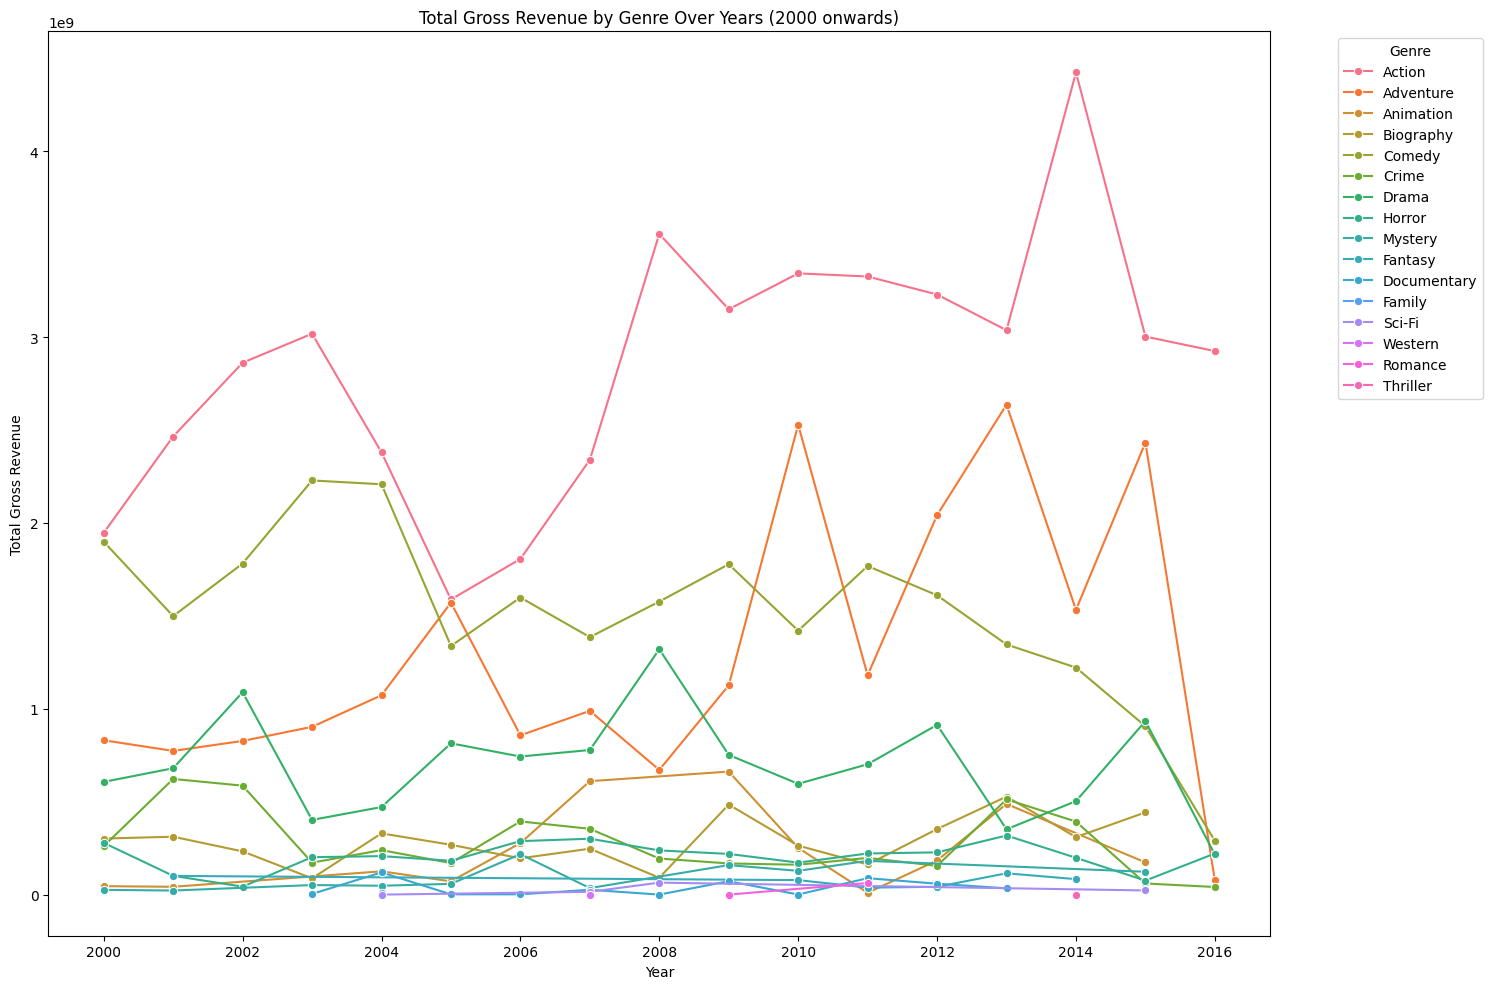

In [57]:
movies
# A line graph with the years from 2000 onwards on the x-axis, total revenue on the y-axis, and lines in different colors representing each genre, showing how much revenue each genre generated in each year.
genre_yearly_gross = (movies[movies["year"] >= 2000]
                      .groupby(["year", "genre"])
                      .agg(total_gross = ("gross", "sum"))
                      .reset_index()
                )

plt.figure(figsize = (15, 10))
sns.lineplot(
    data = genre_yearly_gross,
    x = "year",
    y = "total_gross",
    hue = "genre",
    marker = "o"
)
plt.title("Total Gross Revenue by Genre Over Years (2000 onwards)")
plt.xlabel("Year")
plt.ylabel("Total Gross Revenue")
plt.legend(title = "Genre", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()  
plt.show()


### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.